<a href="https://colab.research.google.com/github/amir925/Falling-Smoking-recognition-with-fastAI/blob/main/Coder_DeepL_4ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~ Image_classification_falling % Smoking ~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

-- Written by: AmirMohammad Ahmadi - 2022
"""

'\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n~~~~~~~ Practical Deep Learning tutorial -- Episode 4 ~~~~~~~\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n\nNo licensing is required to use this code, but I will\nappreciate  if you reference Rational Machines\nIG page and/or YT channel:\n@rational_machines\nbit.ly/3rU7nKY\n\n-- Written by: Soroush Pahlavian - 2021\n'

In [ ]:
!pip install -Uqq fastbook
import fastbook
# fastbook.setup_book()
from fastbook import *
from fastai.vision.all import *

     |████████████████████████████████| 127 kB 25.8 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
selenium 4.1.0 requires urllib3[secure]~=1.26, but you have urllib3 1.25.11 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
# Libraries needed for web-scraping:
!pip install kora -q
!pip install Pillow
from kora.selenium import wd as webdriver # use in web scraping 
from pathlib import Path

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.mkdir('/content/drive/MyDrive/DataML')
os.mkdir(dest + '/smoking' ) 
os.mkdir(dest + '/falling' )        


#path = untar_data (URLs.PETS, dest=dest) / 'images' # download dataset and unzipe and replace it's on 'dest' path

# def is_cat(x):
#      return x[0].isupper() 

# dls = ImageDataLoaders.from_name_func(
#     path=path,
#     fnames=get_image_files(path),        
#     valid_pct=0.2, seed=42,
#     label_func=is_cat,
#     item_tfms=Resize(224)
# )

FileExistsError: ignored

In [ ]:
dest = '/content/drive/MyDrive/DataML'


In [ ]:
type(dest)

str

In [ ]:
from pathlib import Path
dest=Path(dest)
type(dest)

pathlib.PosixPath

In [ ]:
#copy image from one folder to another in python
'''import glob
import shutil
import os
def copy_imagefile (src_dir, dst_dir):
  for jpgfile in glob.iglob(os.path.join(src_dir, "*.jpg")):
      shutil.copy(jpgfile, dst_dir)

copy_imagefile(dest,dest/'smoking')    '''          

In [ ]:
from kora.selenium import wd as webdriver
from pathlib import Path

In [ ]:
!git clone https://github.com/spahlavian/web-scraper.git


Cloning into 'web-scraper'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 22 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (22/22), done.


In [ ]:
import sys
sys.path.append("/content/web-scraper") #search for this pacage in any where

from webScrapper import search_and_download

In [ ]:
srch_term='smoking person headshot'

search_and_download(
    search_term=srch_term,
    wd=webdriver,
    target_path=dest/'smoking', # masiri ke mikhahim axs haye download shode ra be an enteghal dahim
    number_of_images=100, # download 50 picture
    sleep_time=1) # between all picture file to download 1s sleep beacause google not block

Found: 100 search results. Extracting links from 0:100
Found: 100 image links, done!
SUCCESS - saved https://image.shutterstock.com/image-photo/black-man-smoking-cigar-portrait-260nw-73261030.jpg - as /content/drive/MyDrive/DataML/smoking/e198be30b1.jpg
SUCCESS - saved https://c4.wallpaperflare.com/wallpaper/332/990/387/cigarette-man-person-smoking-wallpaper-preview.jpg - as /content/drive/MyDrive/DataML/smoking/7f0500988c.jpg
SUCCESS - saved https://st.focusedcollection.com/9163412/i/1800/focused_184803260-stock-photo-portrait-casual-young-man-smoking.jpg - as /content/drive/MyDrive/DataML/smoking/bbc1014466.jpg
SUCCESS - saved https://thumbs.dreamstime.com/z/young-man-says-no-to-smoking-closeup-portrait-headshot-handsome-business-cigarette-offered-person-stop-hand-gesture-holding-48004982.jpg - as /content/drive/MyDrive/DataML/smoking/e81d430ca1.jpg
SUCCESS - saved https://p1.pxfuel.com/preview/828/626/398/round-smoke-woman.jpg - as /content/drive/MyDrive/DataML/smoking/f8da4e8f2b.jp

/content/drive/MyDrive/DataML/smoking/ed5f3d75cc.jpg


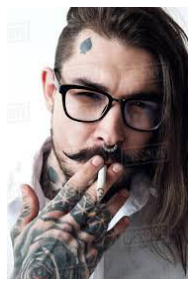

In [ ]:
img_path = get_image_files(dest/'smoking')[10]
print(img_path)
img = PILImage.create(img_path)
show_image(img);

In [ ]:
def label_func(x): 
    return x.parent.name # return file name

dls = ImageDataLoaders.from_path_func(
    path=dest,
    fnames=get_image_files(dest),        
    valid_pct=0.1,
    seed=70,
    label_func=label_func,
    item_tfms=Resize(224)
)

NameError: ignored

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.609420,0.266312,0.111111,00:02


epoch,train_loss,valid_loss,error_rate,time
0,1.281817,0.378690,0.222222,00:02


In [ ]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

Prediction: smoking
TensorBase([0.2497, 0.7503])


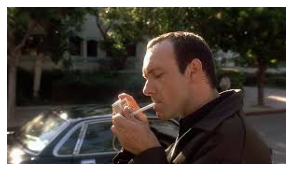

In [ ]:
img = PILImage.create(uploader.data[0])
prediction,_,probs = learn.predict(img)
print(f'Prediction: {prediction}')
print(probs)
show_image(img);

In [ ]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

Prediction: falling
TensorBase([0.6086, 0.3914])


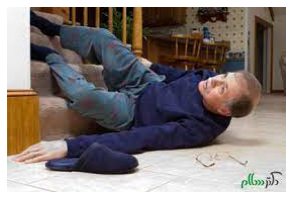

In [ ]:
img = PILImage.create(uploader.data[0])
prediction,_,probs = learn.predict(img)
print(f'Prediction: {prediction}')
print(probs)
show_image(img);

In [ ]:
dls.vocab # list of label in classifacation 

['falling', 'smoking']